In [101]:
import numpy as np
import pandas as pd
import re # Regular Expression - To search words in text or paragraph
import nltk.corpus
from nltk.corpus import stopwords # natural language took-kit (stop words are common words that are useless basically they dont provide anything useful in the textual data)
from nltk.stem.porter import PorterStemmer # gives us the root word of a particular word
from sklearn.feature_extraction.text import TfidfVectorizer # To convert text data into numerical values or feature vectors
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [102]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [103]:
print(stopwords.words('english')) # These words will be removed from the textual dataset

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [104]:
news_dataset = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Classification Models/Fake News Prediction/train.csv')

In [105]:
news_dataset.shape

(20800, 5)

In [106]:
news_dataset.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [107]:
news_dataset.isnull().sum()

,0
id,0
title,558
author,1957
text,39
label,0


In [108]:
# Reaplcing null values with empty strings
news_dataset = news_dataset.fillna('')

In [109]:
news_dataset.isnull().sum()

,0
id,0
title,0
author,0
text,0
label,0


In [110]:
news_dataset['label'].value_counts()

,count
label,
1,10413
0,10387


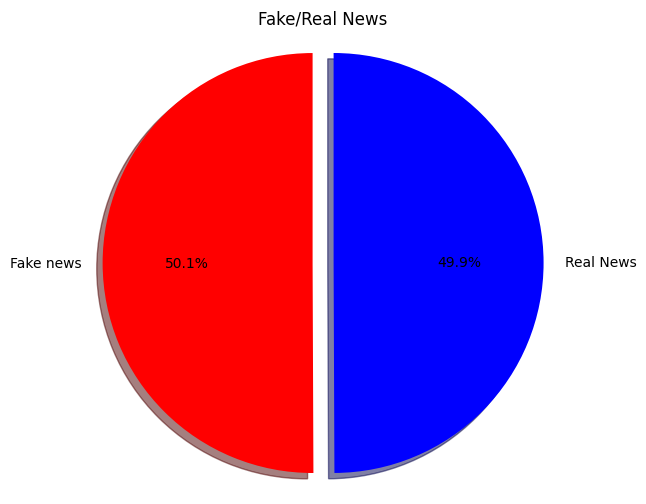

In [111]:
# 1 --> Fake News
# 0 --> Real News

fake_news_distribution = news_dataset['label'].value_counts()

# Create a pie chart
labels = ['Fake news', 'Real News']
sizes = fake_news_distribution .values  # Corresponding counts
colors = ['red', 'blue']  # Custom colors
explode = (0.1, 0)  # Explode the first slice (if Male is first)

# Create the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow = True,startangle=90)

# Equal aspect ratio ensures the pie chart is circular
plt.axis('equal')
plt.title('Fake/Real News')
plt.show()

In [112]:
# we are not going to include text as it is large data and will take a lot of time to process

# merging the author name and news title
news_dataset['content'] = news_dataset['author']+' '+news_dataset['title']

In [113]:
print(news_dataset['content'])

0        Darrell Lucus House Dem Aide: We Didn’t Even S...
1        Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...
2        Consortiumnews.com Why the Truth Might Get You...
3        Jessica Purkiss 15 Civilians Killed In Single ...
4        Howard Portnoy Iranian woman jailed for fictio...
                               ...                        
20795    Jerome Hudson Rapper T.I.: Trump a ’Poster Chi...
20796    Benjamin Hoffman N.F.L. Playoffs: Schedule, Ma...
20797    Michael J. de la Merced and Rachel Abrams Macy...
20798    Alex Ansary NATO, Russia To Hold Parallel Exer...
20799              David Swanson What Keeps the F-35 Alive
Name: content, Length: 20800, dtype: object


In [114]:
# Stemming Procedure - Process of reducing a word to its Root Word (removing suffix)
# eg --> running -- (run) jumps -- (jump) etc

port_stem = PorterStemmer()

In [115]:
def stemming(content):
  stemmed_content = re.sub('[^a-zA-Z]',' ',content) # only including letters (alphabets) and excluding everything else (numbers,special characters) by replacing them with space '  '
  stemmed_content = stemmed_content.lower() # converting whole text to lowercase
  stemmed_content = stemmed_content.split()
  stemmed_content = [port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('english')] # doing stemming for all the words but excluding stopwords(useless words)
  stemmed_content = ' '.join(stemmed_content)
  return stemmed_content

In [116]:
news_dataset['content'] = news_dataset['content'].apply(stemming)

In [117]:
print(news_dataset['content'])

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object


In [118]:
# Sepereating content and label
X = news_dataset['content']
Y = news_dataset['label']

In [119]:
# Converting textual data into meaningful numeric values
vectorizer = TfidfVectorizer() # Gives high importance to unique words that maybe useful
vectorizer.fit(X) # learns the vocabulary and inverse document frequencies for each word in the data. words that appear frequently are given less importance

X = vectorizer.transform(X) # converts all textual data into feature vectors (numeric data)

In [120]:
print(X)
print(Y)

  (0, 267)	0.2701012497770876
  (0, 2483)	0.36765196867972083
  (0, 2959)	0.24684501285337127
  (0, 3600)	0.3598939188262558
  (0, 3792)	0.27053324808454915
  (0, 4973)	0.23331696690935097
  (0, 7005)	0.2187416908935914
  (0, 7692)	0.24785219520671598
  (0, 8630)	0.2921251408704368
  (0, 8909)	0.36359638063260746
  (0, 13473)	0.2565896679337956
  (0, 15686)	0.2848506356272864
  (1, 1497)	0.2939891562094648
  (1, 1894)	0.15521974226349364
  (1, 2223)	0.3827320386859759
  (1, 2813)	0.19094574062359204
  (1, 3568)	0.26373768806048464
  (1, 5503)	0.7143299355715573
  (1, 6816)	0.1904660198296849
  (1, 16799)	0.30071745655510157
  (2, 2943)	0.3179886800654691
  (2, 3103)	0.46097489583229645
  (2, 5389)	0.3866530551182615
  (2, 5968)	0.3474613386728292
  (2, 9620)	0.49351492943649944
  :	:
  (20797, 3643)	0.2115550061362374
  (20797, 7042)	0.21799048897828685
  (20797, 8364)	0.22322585870464115
  (20797, 8988)	0.36160868928090795
  (20797, 9518)	0.29542040034203126
  (20797, 9588)	0.17455348

In [153]:
# Splitting data into training testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2)

In [155]:
print(X.shape,X_train.shape,X_test.shape)

(20800, 17128) (16640, 17128) (4160, 17128)


In [156]:
model = LogisticRegression()

In [157]:
# Training the model
model.fit(X_train,Y_train)

LogisticRegression()

In [158]:
# Evaluating model's performance on training data
training_data_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(training_data_prediction,Y_train)

print('Accuracy score of training data : ',training_data_accuracy)

Accuracy score of training data :  0.9863581730769231


In [159]:
# Evaluating model's performance on testing data
testing_data_prediction = model.predict(X_test)
testing_data_prediction = accuracy_score(testing_data_prediction,Y_test)

print('Accuracy score of training data : ',testing_data_prediction)

Accuracy score of training data :  0.9790865384615385


In [170]:
# Building a predictive system
X_new = X_test[2]

prediction = model.predict(X_new)
print(prediction)

if (prediction[0]==0):
  print('The news is Real')
else:
  print('The news is Fake')

[1]
The news is Fake


In [171]:
print(Y_test.iloc[2])

1
